In [ ]:
!nvidia-smi

Thu Oct 10 17:15:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /content


In [ ]:
%pwd

'/content'

In [ ]:
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...
remote: Enumerating objects: 20332, done.
remote: Counting objects: 100% (2446/2446), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 20332 (delta 2317), reused 2199 (delta 2198), pack-reused 17886 (from 1)
Receiving objects: 100% (20332/20332), 11.14 MiB | 12.94 MiB/s, done.
Resolving deltas: 100% (14337/14337), done.


In [ ]:
%cd yolov10

/content/yolov10


In [ ]:
%pwd

'/content/yolov10'

In [ ]:
!pip install .

Processing /content/yolov10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=731421 sha256=6c77f5ca10d3a1bc68bf5e8c4028bb8d3283d0c472042d643280aa3a7c3d09fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ntkvqu_/wheels/51/93/e8/22d2e815ced343915c15d86b2a00d95eb0a997d012527fbea7
Successfully built ultralytics


In [ ]:
import os
import urllib.request

# Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt",
]

# Download each file
for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"Downloaded {file_name}")

Downloaded /content/yolov10/weights/yolov10n.pt
Downloaded /content/yolov10/weights/yolov10s.pt
Downloaded /content/yolov10/weights/yolov10m.pt
Downloaded /content/yolov10/weights/yolov10b.pt
Downloaded /content/yolov10/weights/yolov10x.pt


In [ ]:
!unzip license_plate.zip

Archive:  license_plate.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/00043e7c5c4c025a_jpg.rf.03d9a59766c367c600074a42712b597c.jpg  
 extracting: train/images/0016bd822c0a9511_jpg.rf.b0e8cec84075a9207ec399cb0710c686.jpg  
 extracting: train/images/00179ef6f55e4ba6_jpg.rf.b6b73748cfe3b630063ae8c5371735d6.jpg  
 extracting: train/images/0018e004f5cac5e0_jpg.rf.a890ffb95ab79564cfc1e01105eb9f54.jpg  
 extracting: train/images/00192c1070c51ae3_jpg.rf.2088e15afcb0e465d0f53c2982159a26.jpg  
 extracting: train/images/001bebecea382500_jpg.rf.ca1af2672f9b6bd5b5bf51ee303e0dc9.jpg  
 extracting: train/images/001ddeda193f5789_jpg.rf.635d51e2ff8bcb1b20dddf76d05a6863.jpg  
 extracting: train/images/0021804a9f9d5db6_jpg.rf.287f203ccc32ac2dc7253aaa14b67faf.jpg  
 extracting: train/images/0022fdfc1880d432_jpg.rf.7dd3bb746074eb2c54f4b204c494b017.jpg  
 extractin

In [ ]:
pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [ ]:
!yolo task=detect mode=train epochs=100 batch=16 plots=True model=weights/yolov10n.pt data=data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

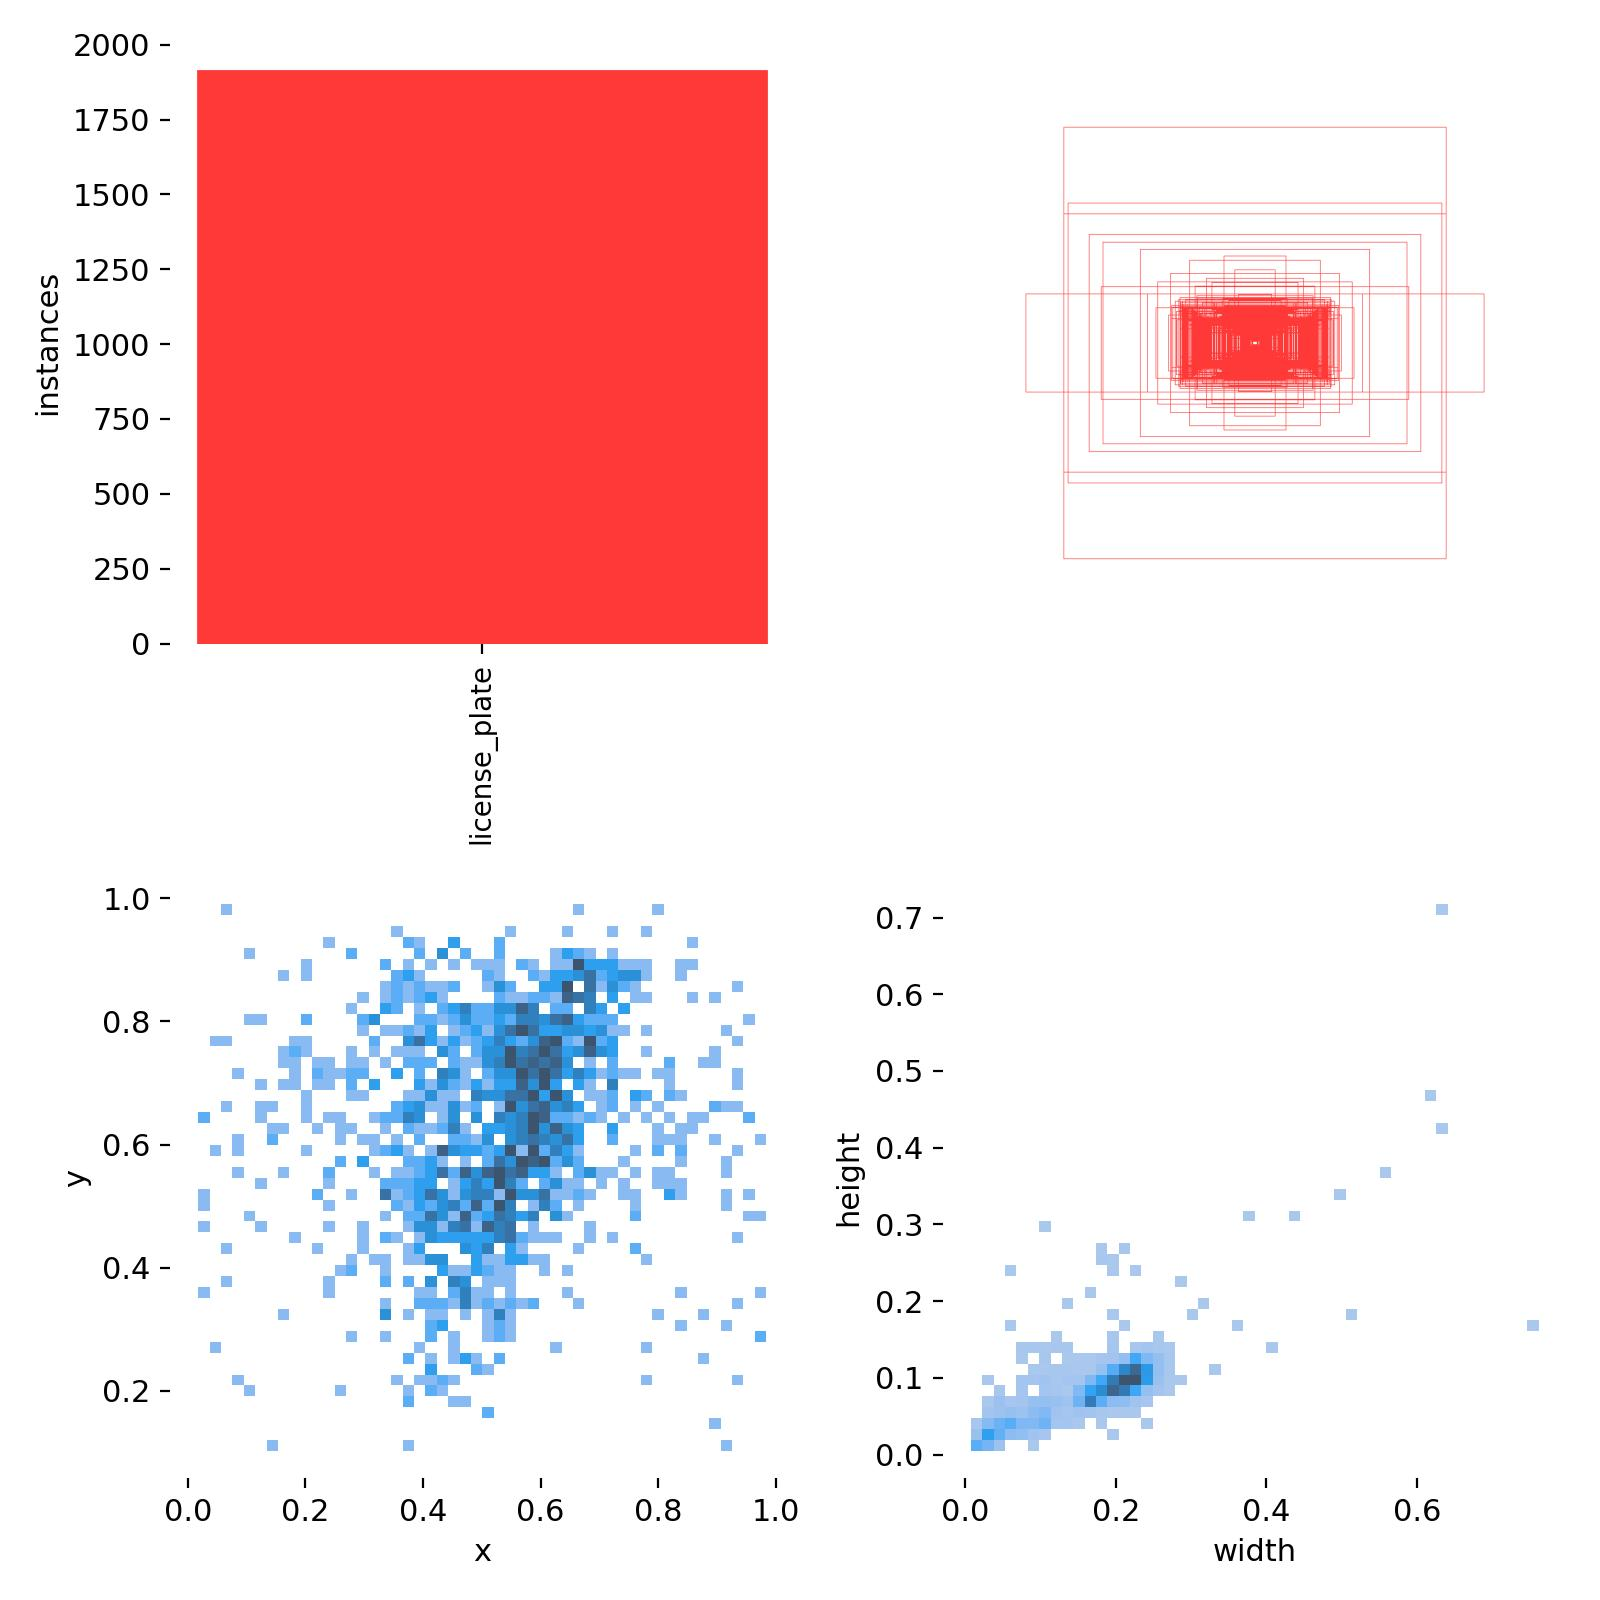

In [ ]:
from IPython.display import Image

Image("/content/yolov10/runs/detect/train/labels.jpg")

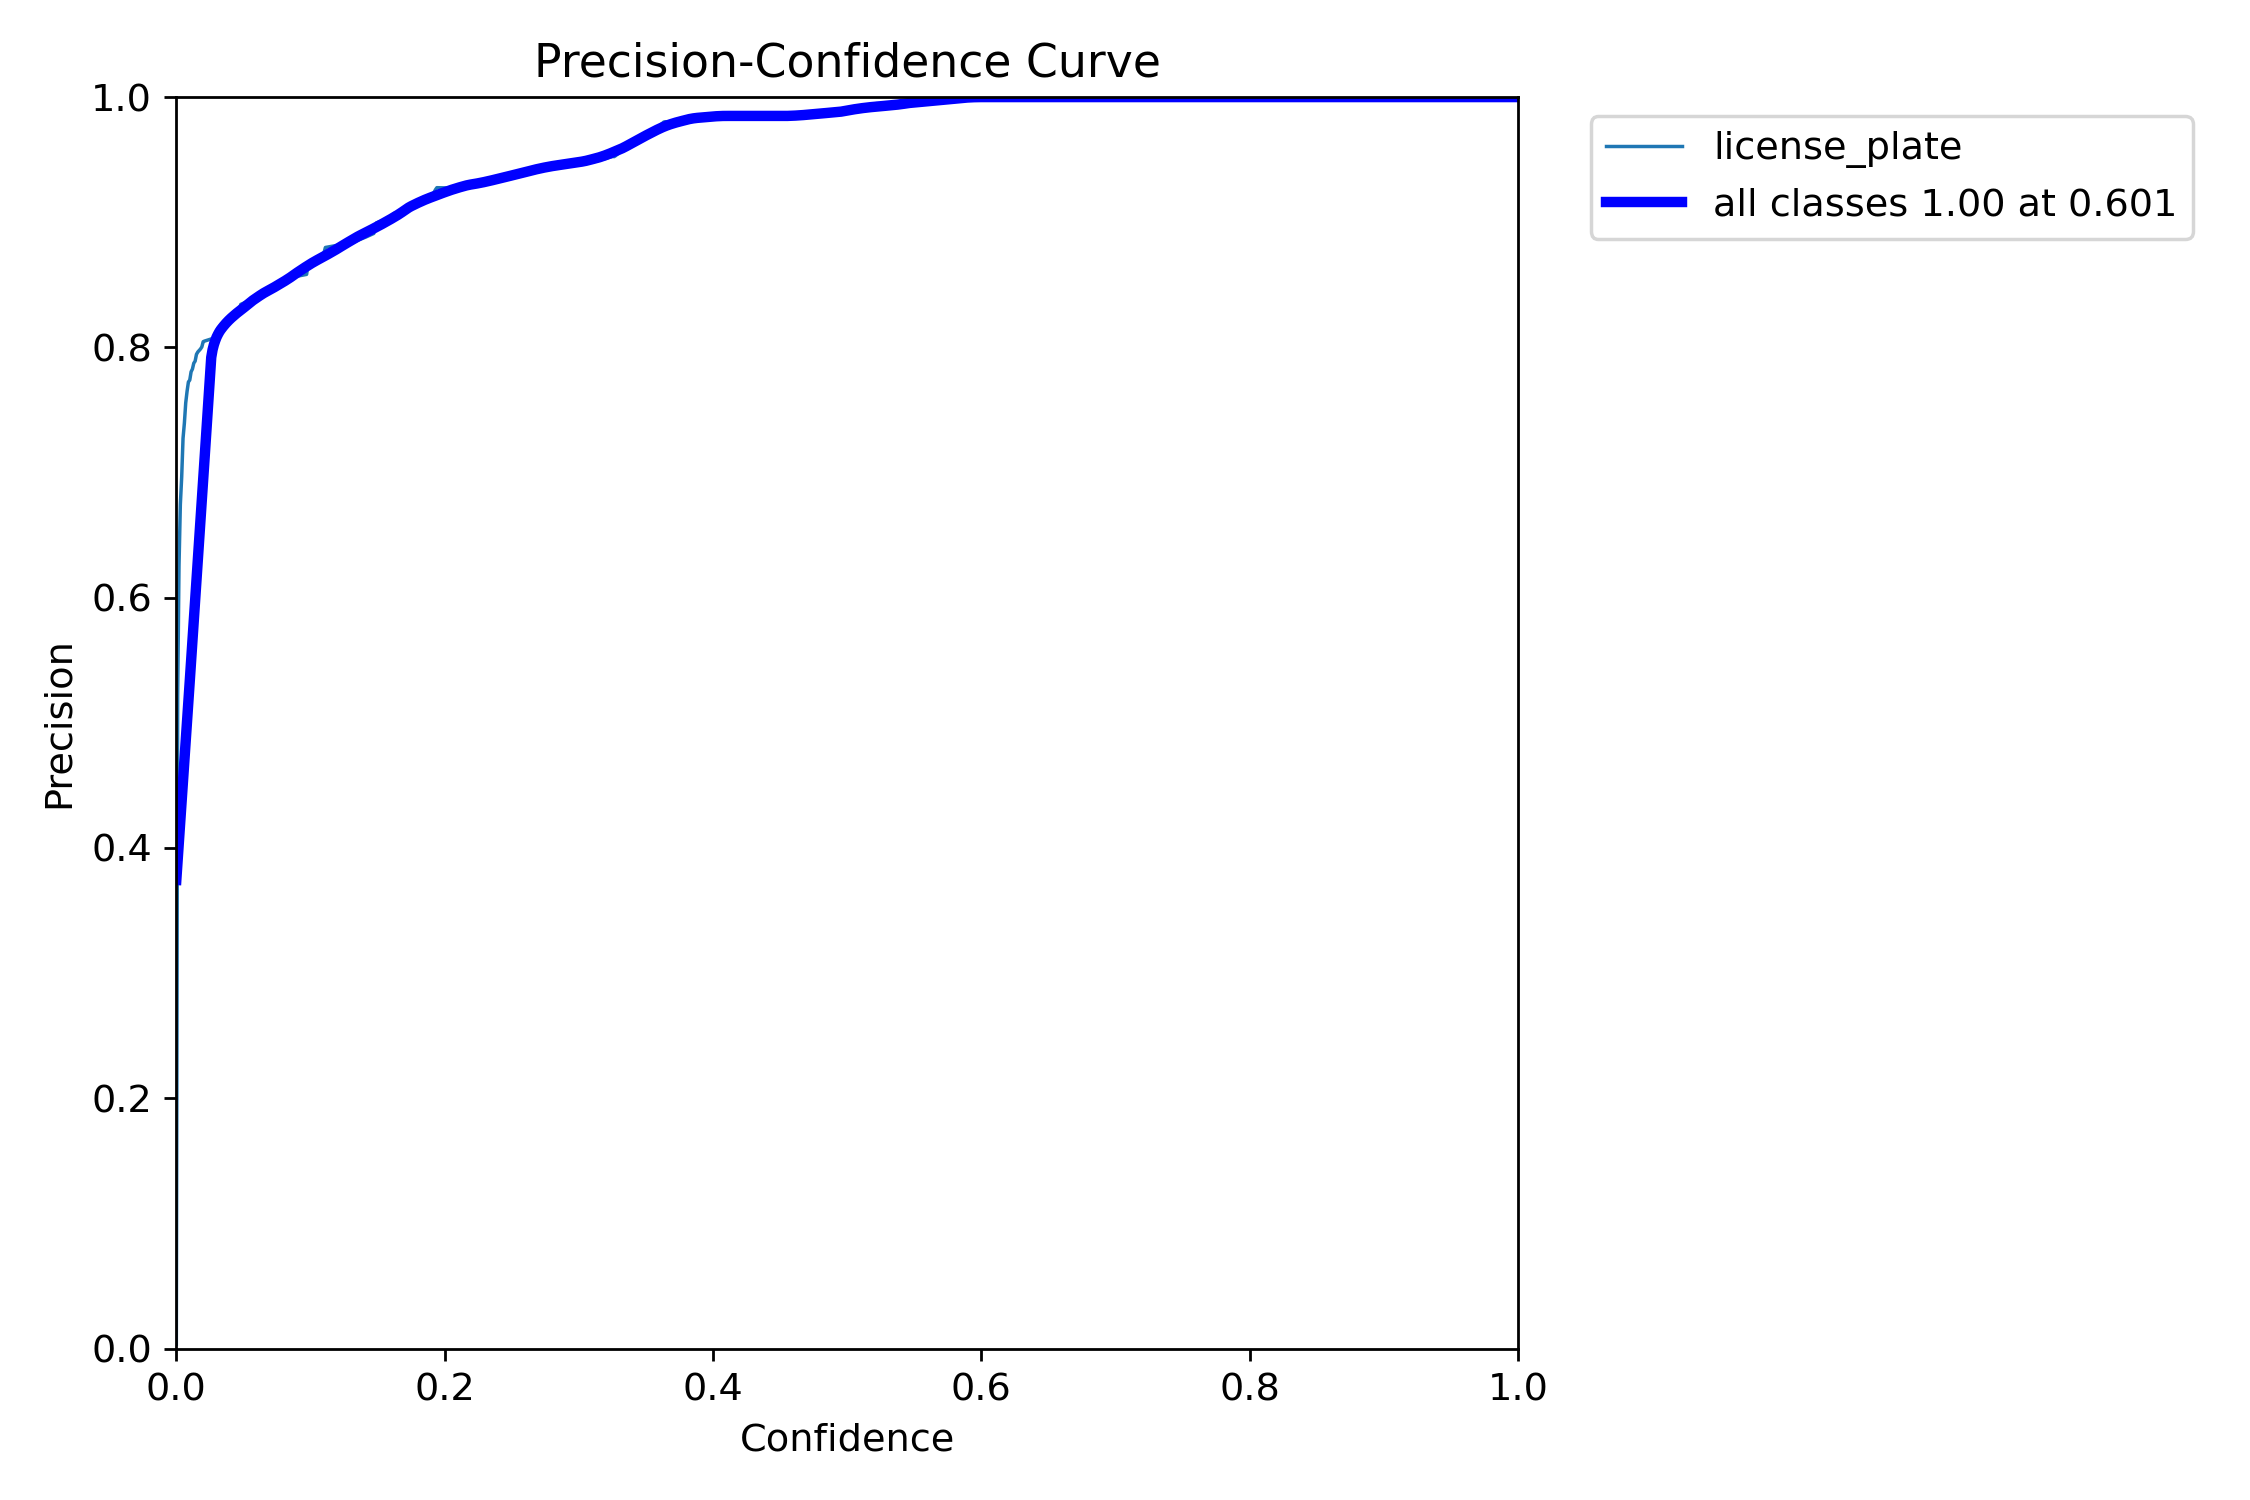

In [ ]:
Image("/content/yolov10/runs/detect/train/P_curve.png")

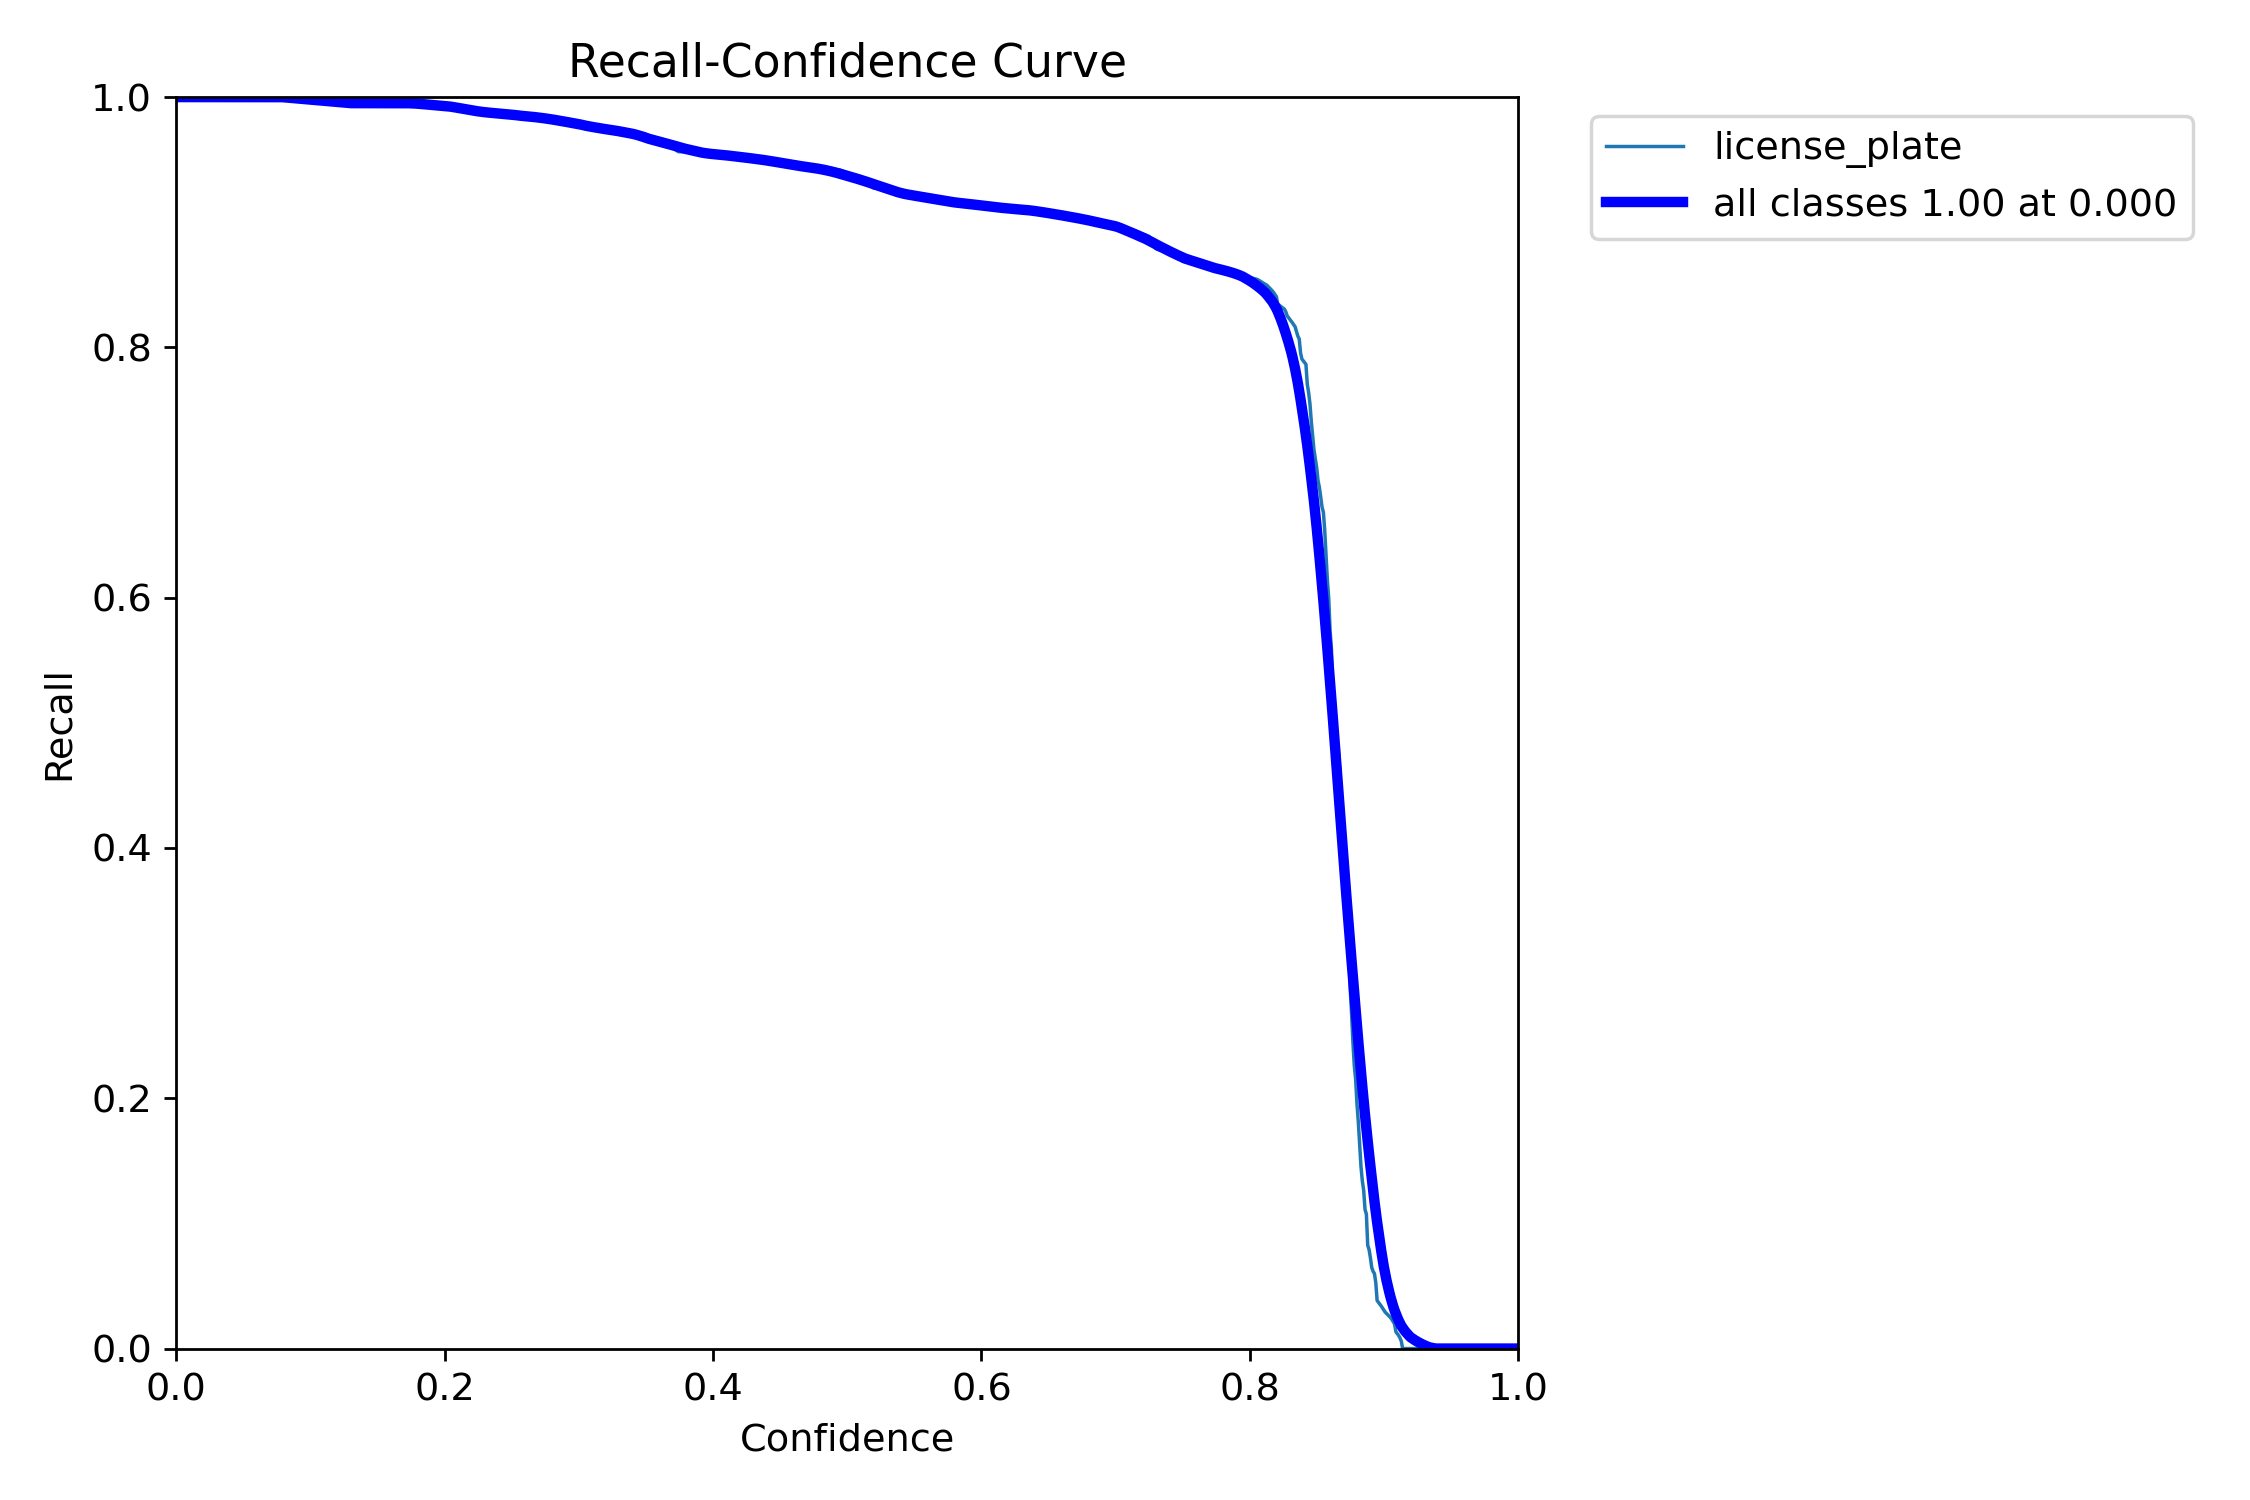

In [ ]:
Image("/content/yolov10/runs/detect/train/R_curve.png")

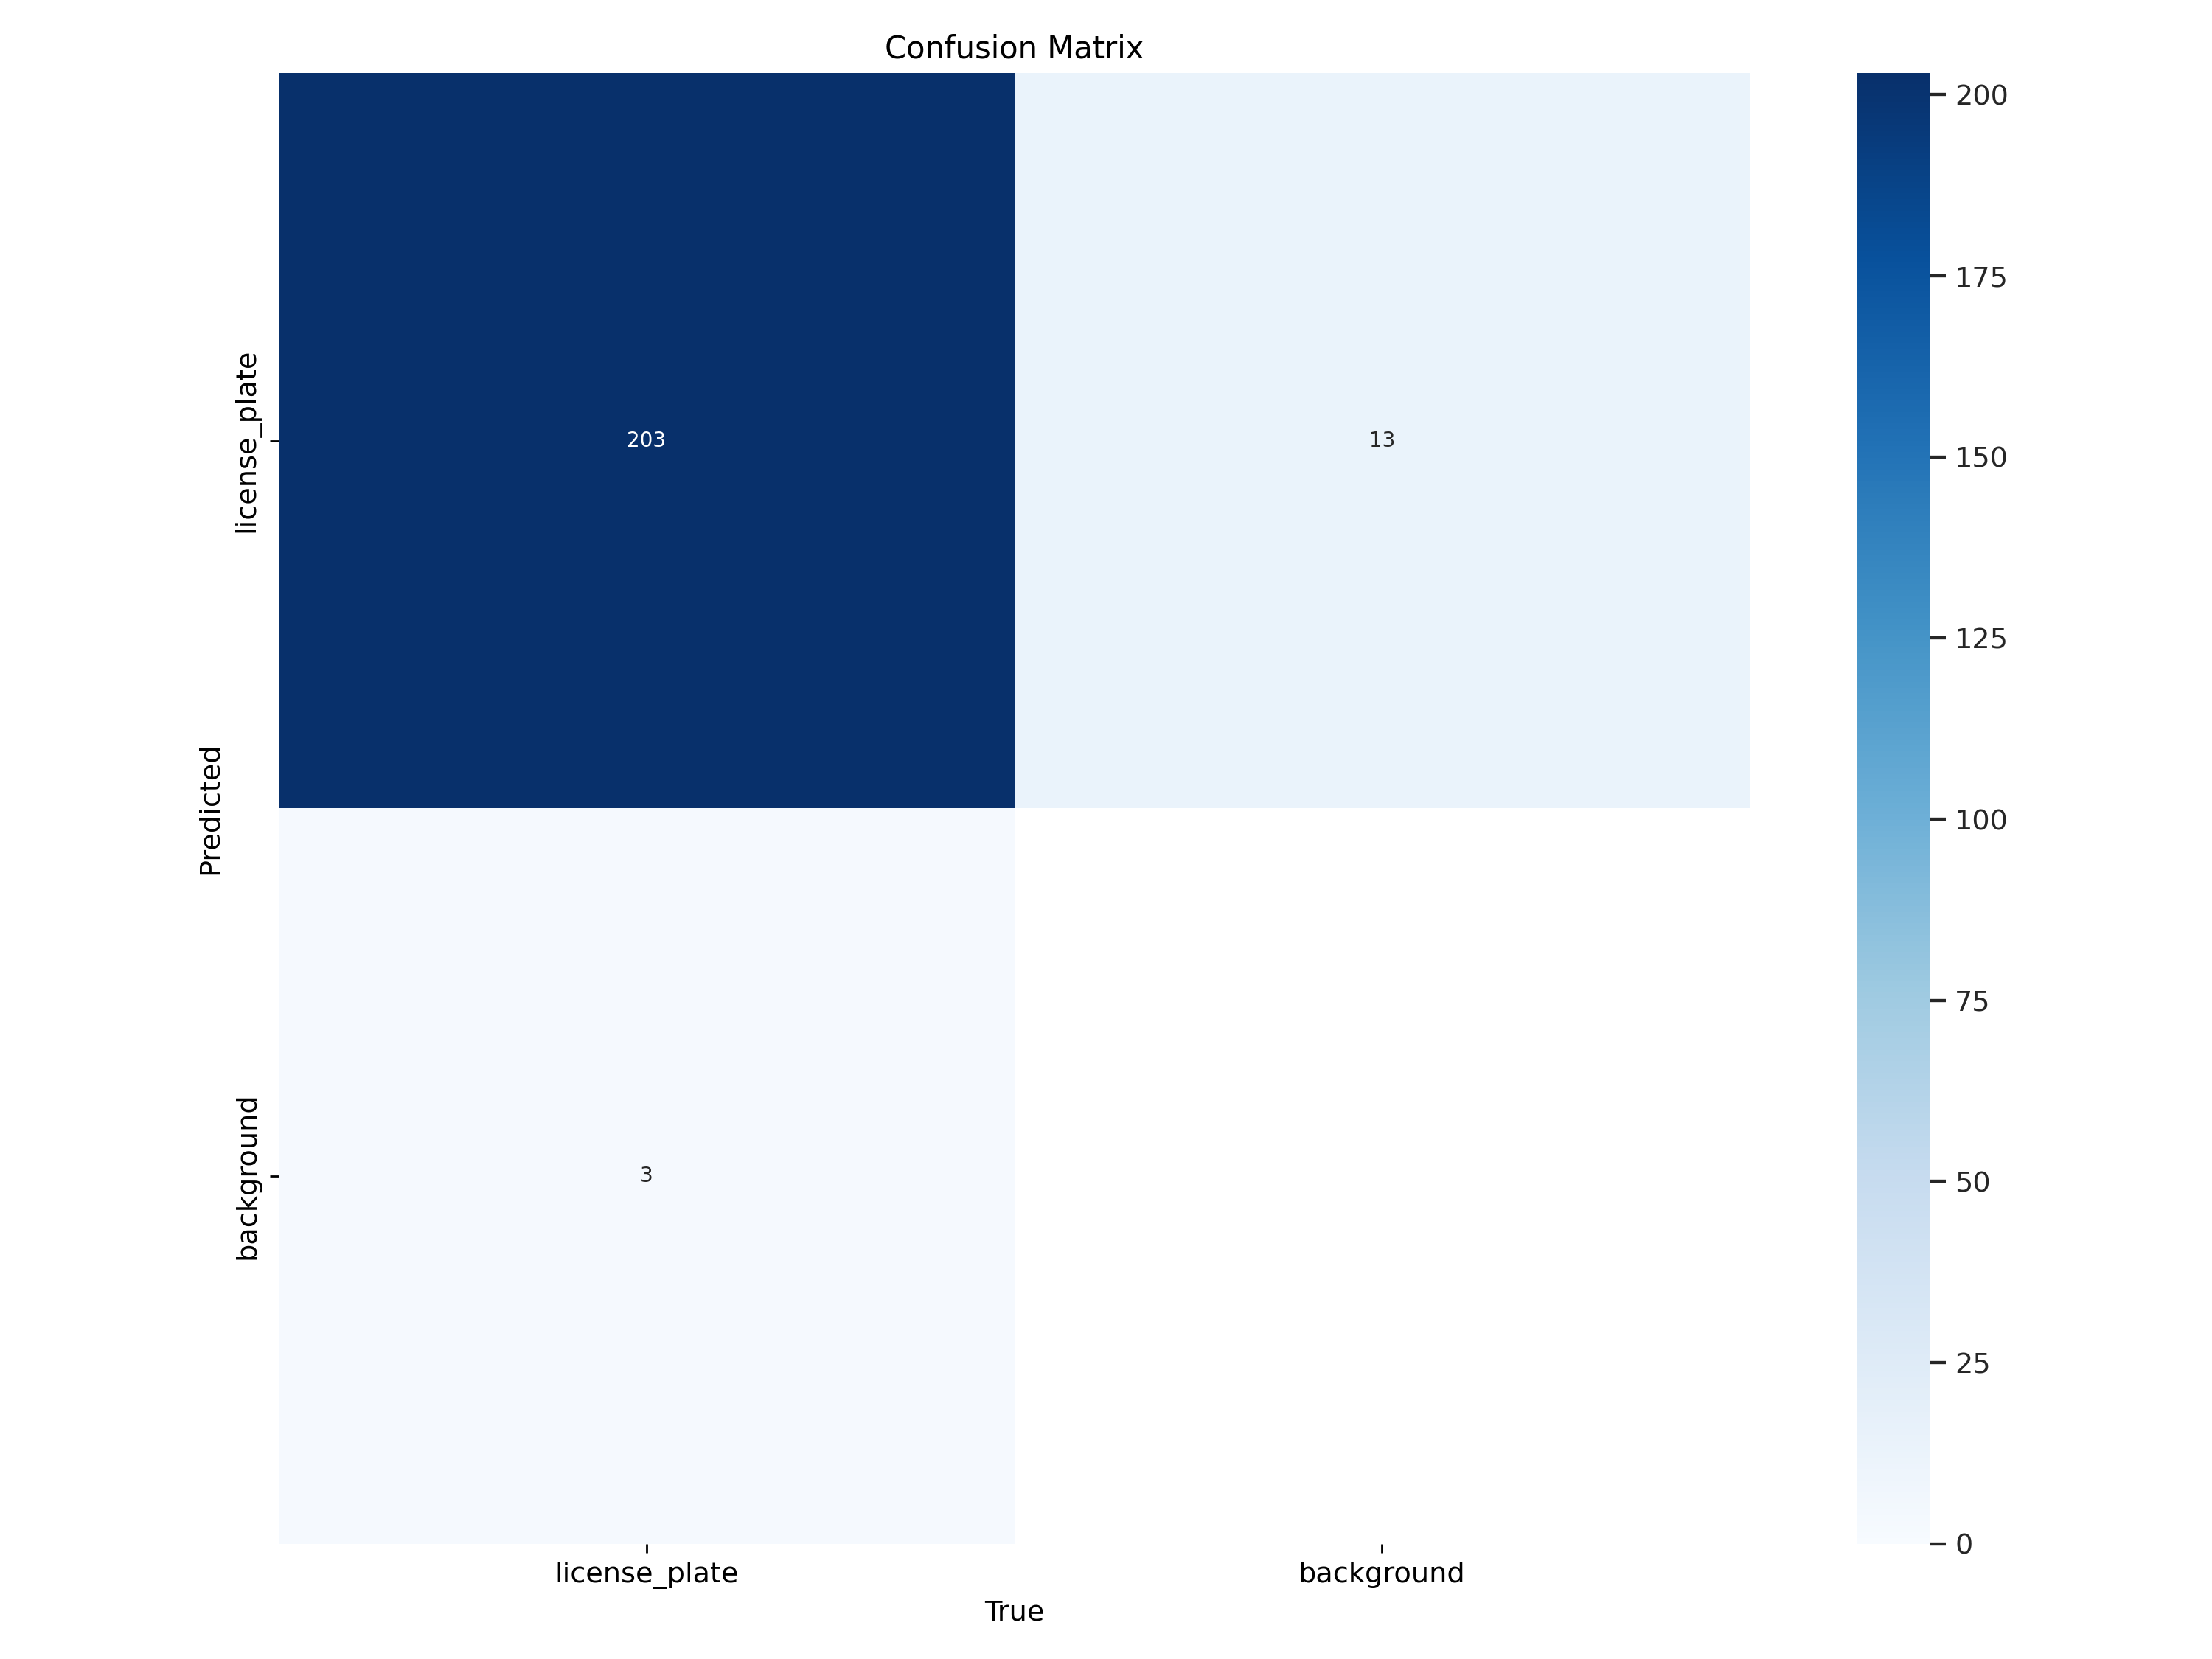

In [ ]:
Image("/content/yolov10/runs/detect/train/confusion_matrix.png")

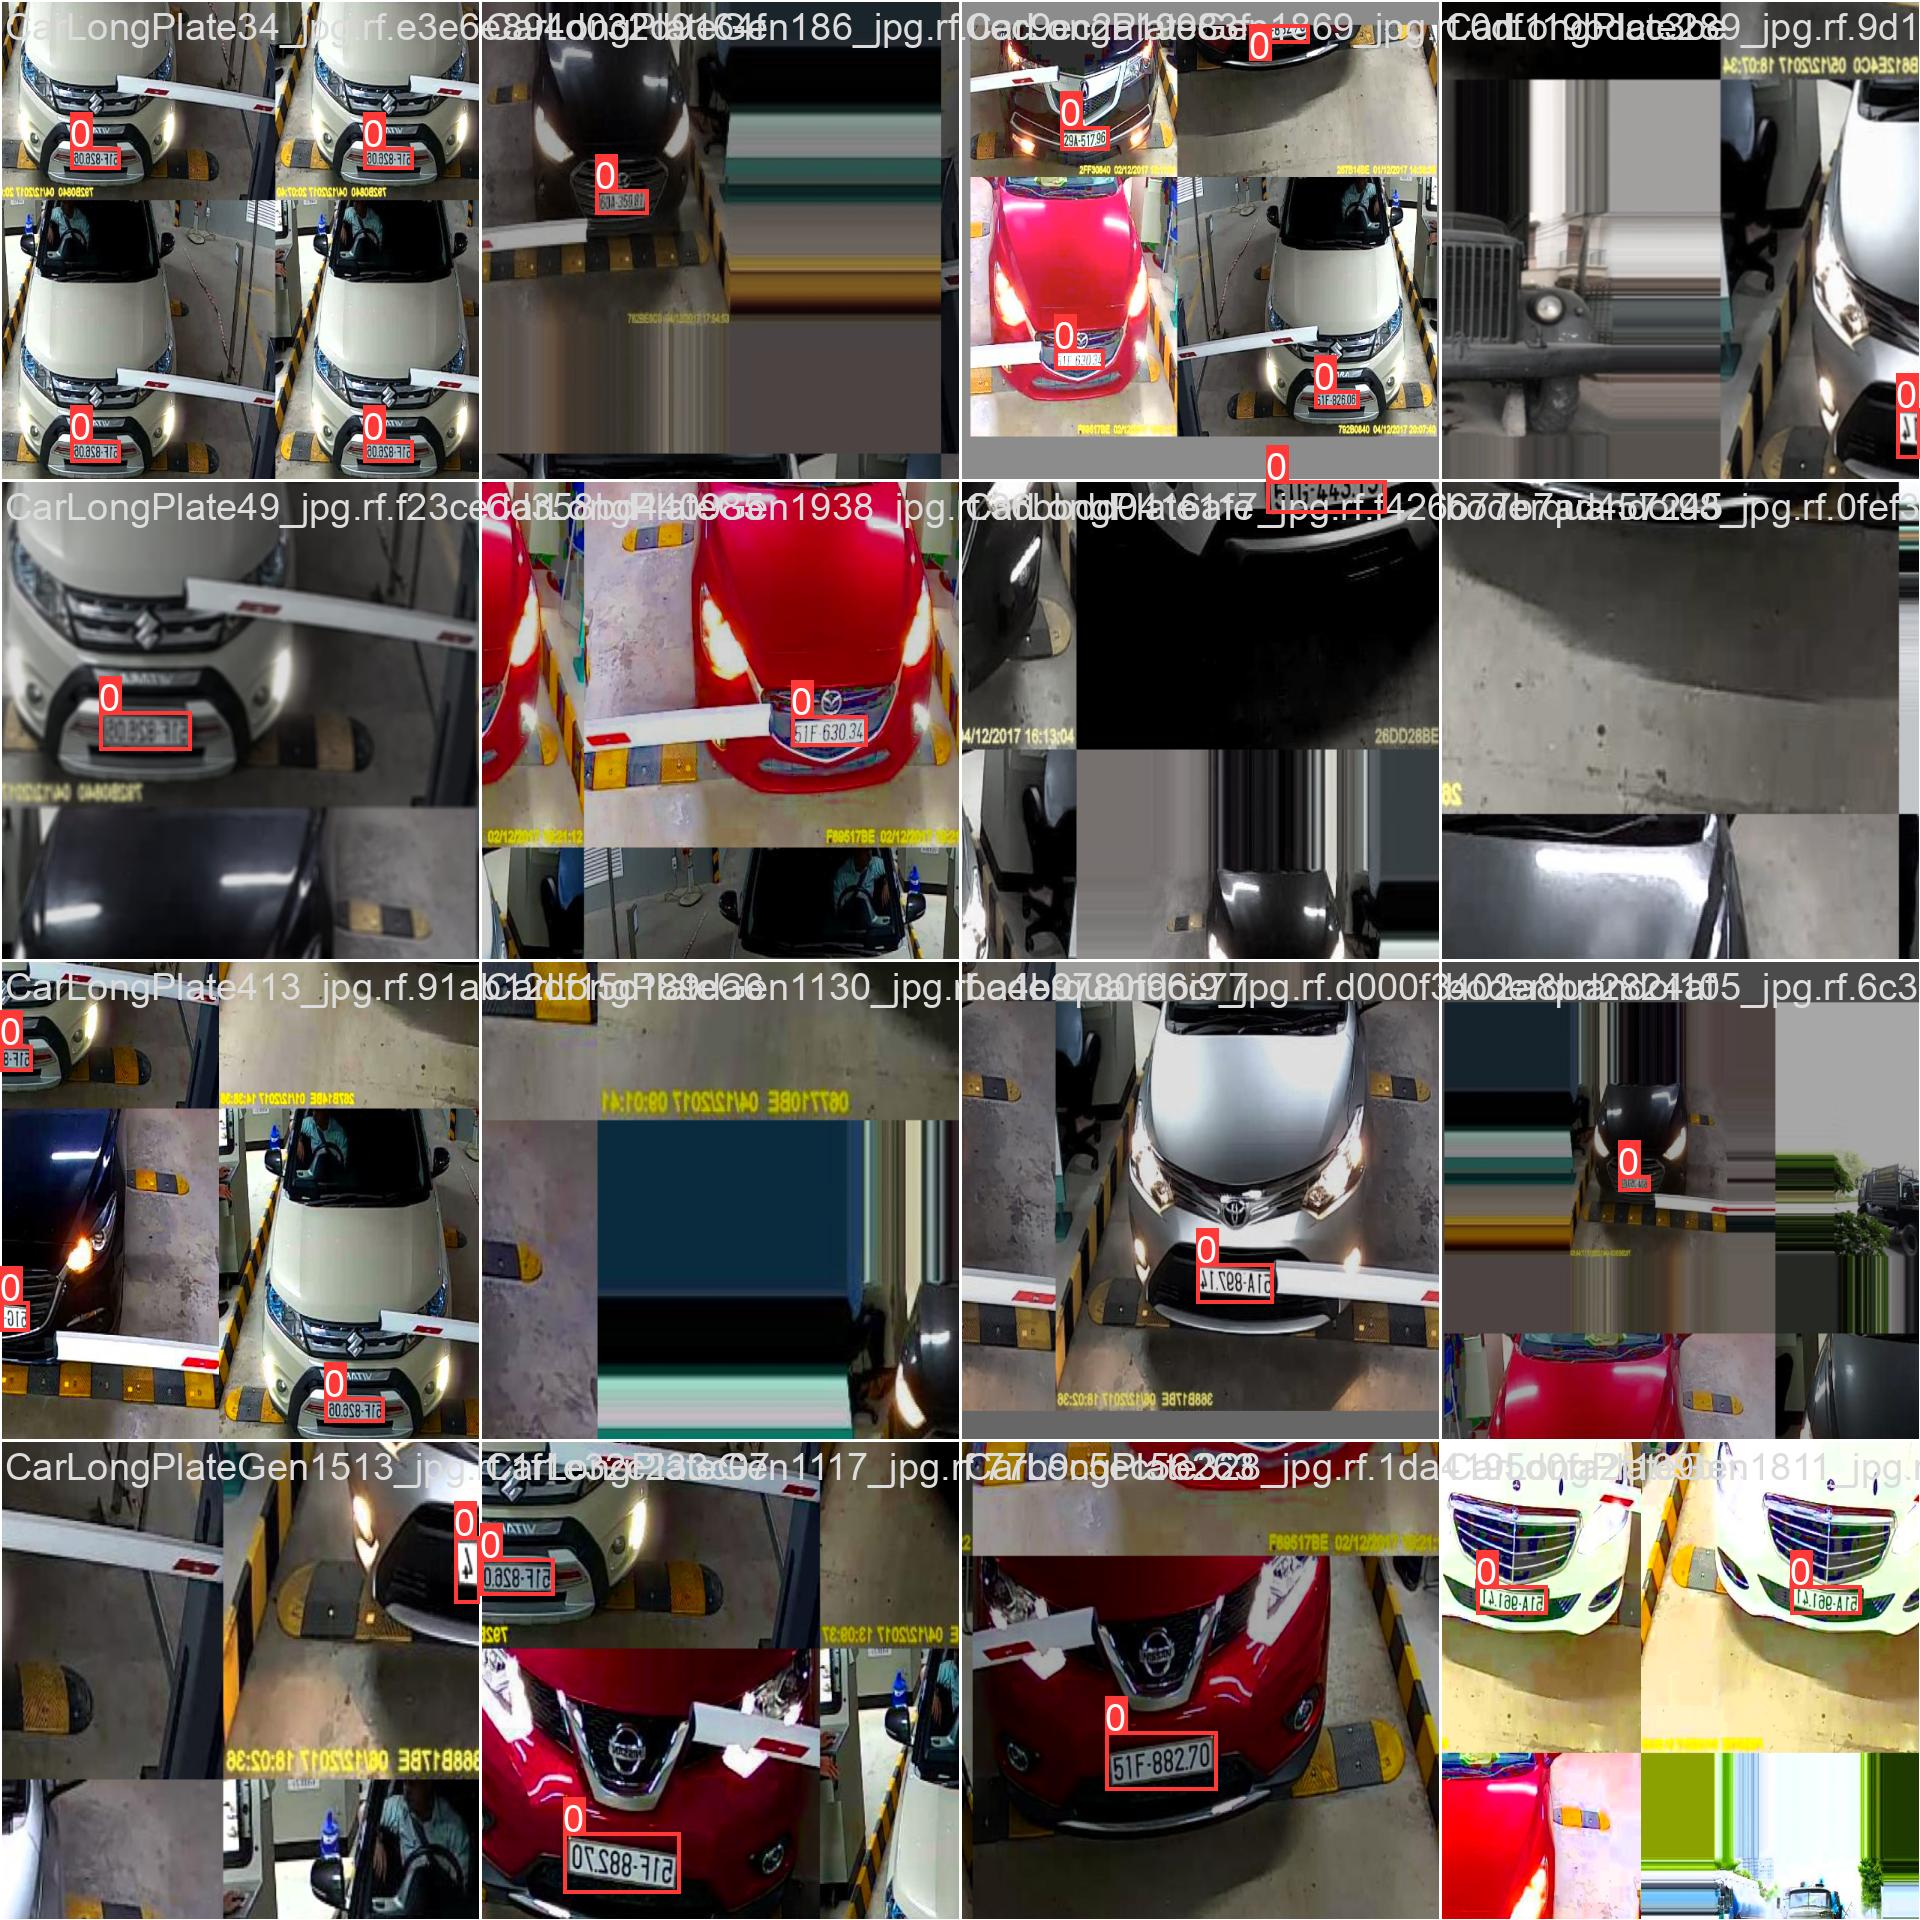

In [ ]:
Image("/content/yolov10/runs/detect/train/train_batch0.jpg")

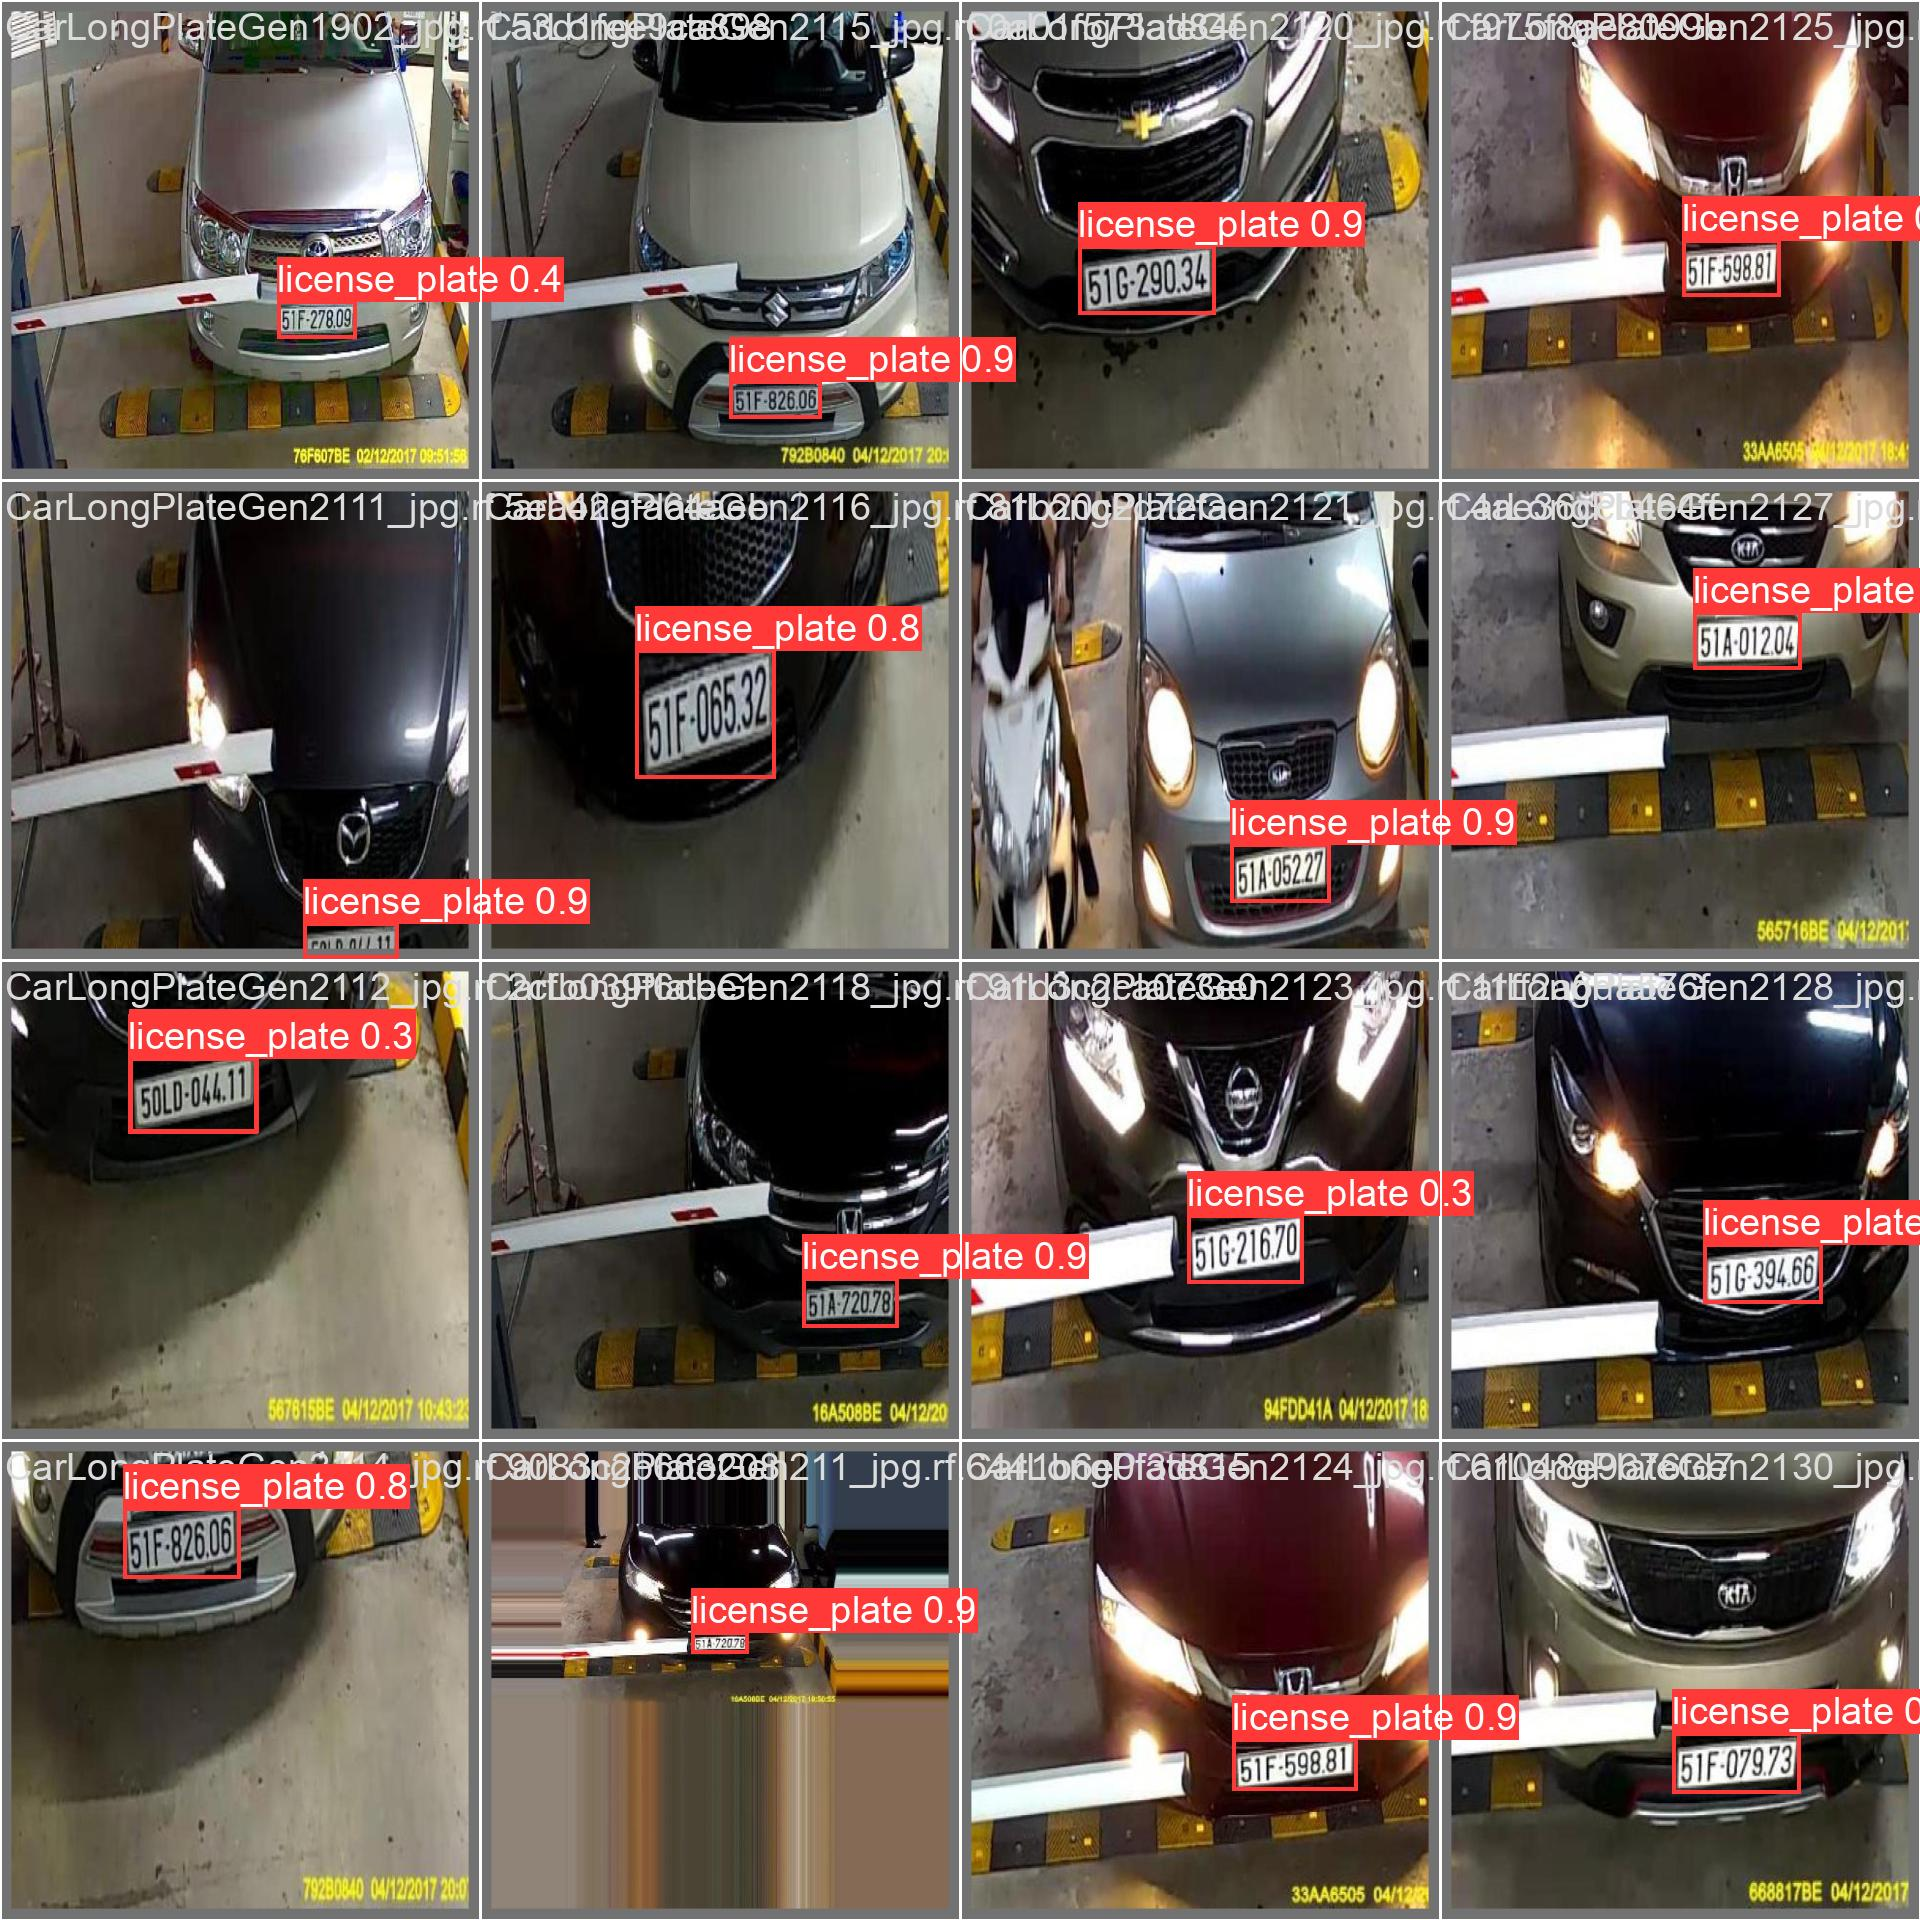

In [ ]:
Image("/content/yolov10/runs/detect/train/val_batch0_pred.jpg")

In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True model='runs/detect/train/weights/best.pt' source='car.mp4'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO